In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Dataset.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.shape

(7043, 21)

In [4]:
del data['customerID']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [5]:
# Converting TotalCharges to float from Object
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors='coerce')
# Converts each data to float and converts the error to NaN

In [6]:
data['TotalCharges'].isnull().sum()
# We will drop these rows since only 11 out of 7043

11

In [7]:
data[data['TotalCharges'].isnull()]
# Rows with TotalCharges as null

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [8]:
l = [488,753,936,1082,1340,3331,3826,4380,5218,6670,6754]
data = data.drop(l)
data.shape

(7032, 20)

Male      3549
Female    3483
Name: gender, dtype: int64


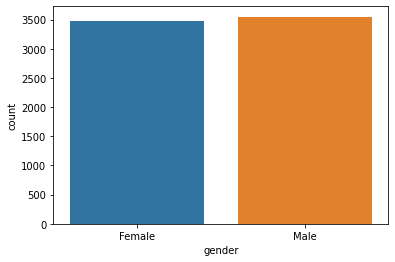

In [9]:
# Gender Count
print(data['gender'].value_counts())
sns.countplot(x='gender',data=data)

In [10]:
data['SeniorCitizen'].value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

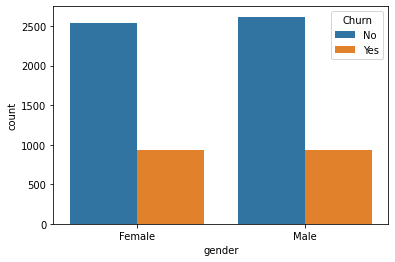

In [11]:
sns.countplot(x='gender',hue='Churn',data=data)

In [12]:
data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


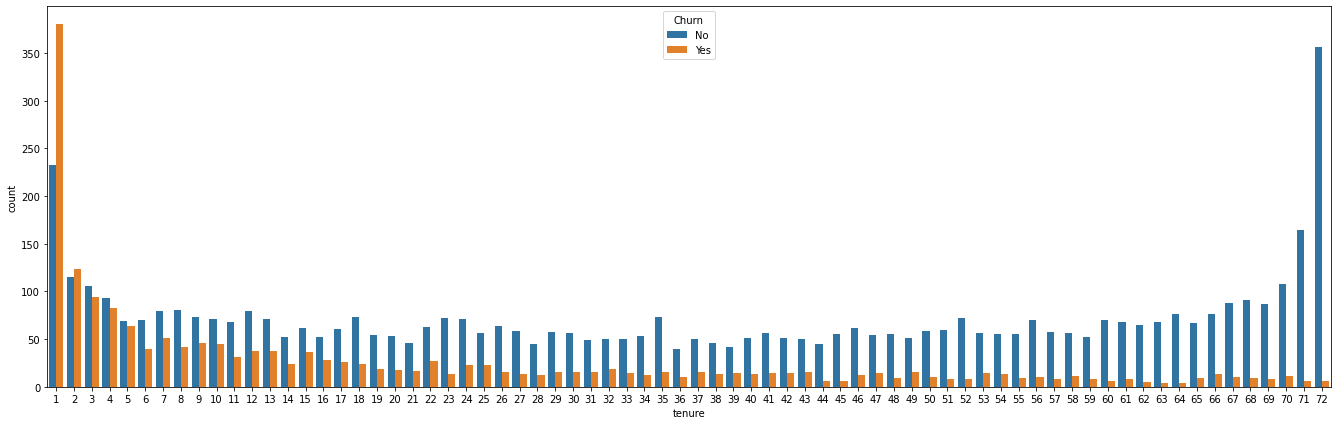

In [13]:
plt.figure(figsize=(23,7))
sns.countplot(x='tenure',hue='Churn',data=data)
# Customers with long tenures are very unlikely to leave

In [14]:
for col in data.columns:
  if(data[col].dtype=='object'):
    print(f'{col} : {data[col].unique()}')
# No internet service can be replaced with No
# No phone service can also be replaced with No

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [15]:
data.replace('No internet service','No',inplace=True)
data.replace('No phone service','No',inplace=True)

In [16]:
for col in data.columns:
  if(data[col].dtype=='object'):
    print(f'{col} : {data[col].unique()}')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [17]:
data = pd.get_dummies(data,drop_first=True)
data.head(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0


In [18]:
# Scaling tenure, MonthlyCharges and TotalCharges becuase rest all columns are already between 0 and 1

scale_col = ['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()
data[scale_col] = ms.fit_transform(data[scale_col])

In [19]:
data.head(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,0.000000,0.115423,0.001275,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
1,0,0.464789,0.385075,0.215867,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0


In [20]:
X = data.iloc[:,data.columns!='Churn_Yes']
Y = data['Churn_Yes']

In [21]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [22]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU
from keras.layers import Dropout

In [23]:
clf = Sequential()

In [24]:
clf.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 23))

clf.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))

clf.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [25]:
clf.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [26]:
clf.fit(x_train, y_train, batch_size=20, epochs = 50)

Epoch 1/50
282/282 [==============================] - 2s 4ms/step - loss: 0.5368 - accuracy: 0.7335
Epoch 2/50
282/282 [==============================] - 1s 3ms/step - loss: 0.4473 - accuracy: 0.7678
Epoch 3/50
282/282 [==============================] - 1s 4ms/step - loss: 0.4330 - accuracy: 0.7929
Epoch 4/50
282/282 [==============================] - 1s 3ms/step - loss: 0.4246 - accuracy: 0.8005
Epoch 5/50
282/282 [==============================] - 1s 3ms/step - loss: 0.4207 - accuracy: 0.7998
Epoch 6/50
282/282 [==============================] - 1s 3ms/step - loss: 0.4181 - accuracy: 0.8044
Epoch 7/50
282/282 [==============================] - 1s 3ms/step - loss: 0.4163 - accuracy: 0.8043
Epoch 8/50
282/282 [==============================] - 1s 3ms/step - loss: 0.4157 - accuracy: 0.8050
Epoch 9/50
282/282 [==============================] - 1s 3ms/step - loss: 0.4141 - accuracy: 0.8052
Epoch 10/50
282/282 [==============================] - 1s 3ms/step - loss: 0.4133 - accuracy: 0.8060

In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [28]:
def prob(a):
  a_prob = []
  for i in a:
    if(i>0.5):
      a_prob.append(1)
    else:
      a_prob.append(0)
  return a_prob

In [29]:
y_pred = prob(clf.predict(x_test))
confusion_matrix(y_test,y_pred)

array([[949,  89],
       [190, 179]])

In [30]:
accuracy_score(y_test,y_pred)

0.8017057569296375

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1038
           1       0.67      0.49      0.56       369

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407

